# Import Libraries

In [19]:
import os
import config as cfg
import pandas as pd
import mysql.connector

from dotenv import load_dotenv
load_dotenv("mysql.env")

import matplotlib.pyplot as plt
import seaborn as sns

# MySQL connection
Choosing one stock from SQL query to reduce query time.

In [14]:
HOST=os.environ.get("HOST")
PORT=os.environ.get("PORT")
USER=os.environ.get("USER")
PASSWORD=os.environ.get("PASSWORD")

try: 
    conn = mysql.connector.connect(
        host=HOST,
        port=PORT,
        user=USER,
        password=PASSWORD,
        database="GlobalMarketData"
    )
    query = "SELECT Date, Close, Open, High, Low, Volume from histdailyprice3 WHERE Symbol='AAPL';"
    df = pd.read_sql(query, conn)
    conn.close()
except Exception as e:
    mydb.close()
    print(str(e))

# Data

In [16]:
df.head()

,Date,Close,Open,High,Low,Volume
0,1998-01-01,0.1172,0.1172,0.1172,0.1172,0
1,1998-01-02,0.1217,0.1451,0.1205,0.1451,25646800
2,1998-01-05,0.1473,0.1479,0.1356,0.1418,23277200
3,1998-01-06,0.1423,0.1786,0.1317,0.1691,64766000
4,1998-01-07,0.1680,0.1697,0.1546,0.1563,37200800


## Calculate Daily Returns

In [17]:
df['Return'] = 100 * (df['Close'].pct_change())

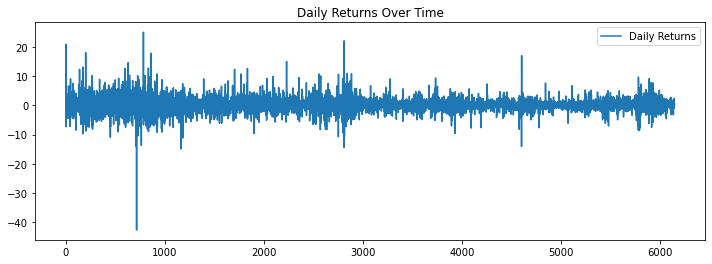

In [20]:
df.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()